<a href="https://www.kaggle.com/code/alaaibrahim2222/deep-learning-final-diabetes-prediction?scriptVersionId=215464874" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**IMPORT**

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


****Define feature columns and label****

In [3]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[feature_cols]  # Predictors (features)
y = data['Outcome']     # Label (target variable)

**Normalize the features**

In [4]:
X_norm = X.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


**Split data into training and test sets**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=42)

**One-hot encode labels for training and testing sets**

In [6]:

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

**Initialize the model**

In [7]:
inputs = Input(shape=(X_train.shape[1],))
# Hidden layers
x = Dense(128, activation='relu')(inputs)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(32, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output layer
outputs = Dense(2, activation='softmax')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
optimizer = Adam(learning_rate=0.005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

**Compile the model**

In [8]:
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


**Define early stopping monitor**

In [9]:
early_stopping_monitor = EarlyStopping(patience=10)


**Train the model**

In [10]:
# Learning rate scheduler (reduce the learning rate after each epoch)
def lr_schedule(epoch):
    return 0.008 * (0.7 ** (epoch // 5))

lr_scheduler = LearningRateScheduler(lr_schedule)


# Train the model
model_training = model.fit(X_train, y_train, validation_split=0.7, epochs=200, 
                           callbacks=[early_stopping_monitor, lr_scheduler], verbose=1)


Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.5394 - loss: 1.0613 - val_accuracy: 0.3639 - val_loss: 0.7216 - learning_rate: 0.0080
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7100 - loss: 0.6870 - val_accuracy: 0.4678 - val_loss: 0.6967 - learning_rate: 0.0080
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6693 - loss: 0.8018 - val_accuracy: 0.5545 - val_loss: 0.6764 - learning_rate: 0.0080
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7712 - loss: 0.5314 - val_accuracy: 0.7129 - val_loss: 0.6425 - learning_rate: 0.0080
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7739 - loss: 0.5303 - val_accuracy: 0.7426 - val_loss: 0.6316 - learning_rate: 0.0080
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8315 - loss: 0.4071 - val_accuracy: 0.7401 - val_loss: 0.6224 - learning_rate: 0.0056
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7769 - loss: 0.4731 - val_accuracy: 

**Visualize training and validation loss**

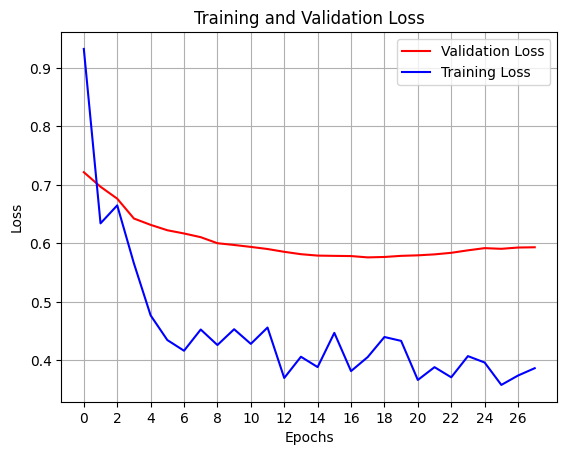

In [11]:
# Plot training and validation loss
plt.plot(model_training.history['val_loss'], 'r', label='Validation Loss')
plt.plot(model_training.history['loss'], 'b', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.xticks(np.arange(0, len(model_training.history['loss']), step=2))
plt.legend()
plt.grid()
plt.show()



**Save the trained model**

In [12]:
model.save('Diabetes_model.h5')

**Load the saved model**

In [13]:
model = load_model('Diabetes_model.h5')
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,452 (48.64 KB)

 Trainable params: 12,002 (46.88 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2 (12.00 B)

**Make predictions on the test set**

In [14]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Display the probabilities for class "1" (indicating diabetic)
print(predictions[:, 1])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  
[0.22970457 0.16891567 0.1230264  0.19413632 0.27700752 0.2924257
 0.09518679 0.25763375 0.3304819  0.36723313 0.22593226 0.5053753
 0.23949067 0.24222304 0.14406523 0.2562391  0.15163715 0.13708235
 0.34054145 0.24514933 0.18980879 0.15227115 0.32108974 0.13664225
 0.28888842 0.47898757 0.16663606 0.12444068 0.1760268  0.17486343
 0.43506607 0.38893598 0.41746777 0.31700674 0.28574878 0.39838737
 0.64774585 0.2616262  0.33104172 0.22789498 0.13047215 0.32555133
 0.33266553 0.1888647  0.11390205 0.33928278 0.4191725  0.17780256
 0.28392822 0.4992242  0.11934875 0.44119057 0.4495234  0.18521549
 0.16251221 0.11253934 0.37976328 0.1028327  0.24240926 0.3221591
 0.41011655 0.2156173  0.32534763 0.20704654 0.1323796  0.33813146
 0.11776729 0.2534957  0.13294871 0.341016   0.39327124 0.14765918
 0.19612393 0.1476304  0.13233592 0.3799573  0.22821844 0.22871089
 0.17654797 0.15575203 0.2943885  0.17153022 0.13665801 0.27213526
 0.19224119 0.4130225  0.4